In [1]:
%cd ../

/data/mayu-ot/Experiments/rethinking-evs


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns

In [3]:
sns.set_style('dark')
sns.set_context("paper", font_scale=1.6) 

In [4]:
df = pd.read_csv('data/raw/human_evaluation/human_evaluation.csv')

ans_cvt = {
    'A Much More Than B': 2,
    'A More Than B': 1,
    'A Equal To B': 0,
    'A Less Than B': -1,
    'A Much Less Than B': -2
}
answer = [ans_cvt[x] for x in df['which_video_better_summarizes_the_original_video_']]
df['answer'] = answer

In [5]:
def plot_score_barh(method_a, method_b, title=None, saveto=None):
    data = []
    index = []
    sub_df = df[(df.method_a == method_a) & (df.method_b == method_b)]
    for video in sub_df.video.unique():
        answer = sub_df[sub_df.video == video]['which_video_better_summarizes_the_original_video_']
        answer_count = answer.value_counts()
        item = {i:c for i, c in answer_count.iteritems()}
        index.append(video[:-4])
        data.append(item)
        
    count_df = pd.DataFrame(data, index=index)
    count_df = count_df[[
    'A Much More Than B',
    'A More Than B',
    'A Equal To B',
    'A Less Than B',
    'A Much Less Than B'
    ]]
    plt.figure(figsize=(10, 12))
    count_df.plot.barh(stacked=True,
                       ax=plt.gca(),
                       color=sns.diverging_palette(10, 220, n=5)[::-1],
                      fontsize=16)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5,-0.13))
    plt.title(title)
    
    if saveto is None:
        plt.show()
        plt.close('all')
    else:
        plt.savefig(saveto, bbox_inches='tight')

## Comparison of video summaries with different segmentation methods: Uniform vs KTS

method A: Video summaries generated using random scoring with uniform segmentation

method B: Video summaries generated using random scoring with KTS segmentation

score:
- 2 method A better than method B
- 0: method A is eqally good (bad) to B
- -2: method A worse than method B

([<matplotlib.axis.XTick at 0x7f715fe95710>,
 <a list of 5 Text xticklabel objects>)

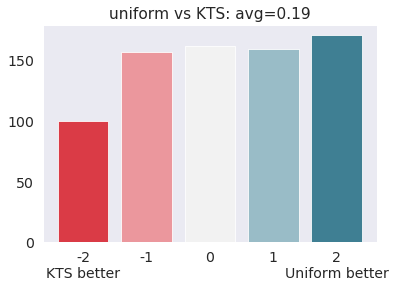

In [6]:
sub_df = df[(df.method_a == 'r_uni') & (df.method_b == 'r_kts')]
answer = sub_df.answer
answer_count = answer.value_counts()
index = np.arange(-2, 3)
plt.bar(index,
        answer_count[index],
        color=sns.diverging_palette(10, 220, n=5))
plt.title('uniform vs KTS: avg=%.2f'%answer.mean())
plt.xticks(np.arange(-2, 3), ['-2\n{} better'.format('KTS'),
                              '-1', '0', '1',
                              '2\n{} better'.format('Uniform')])

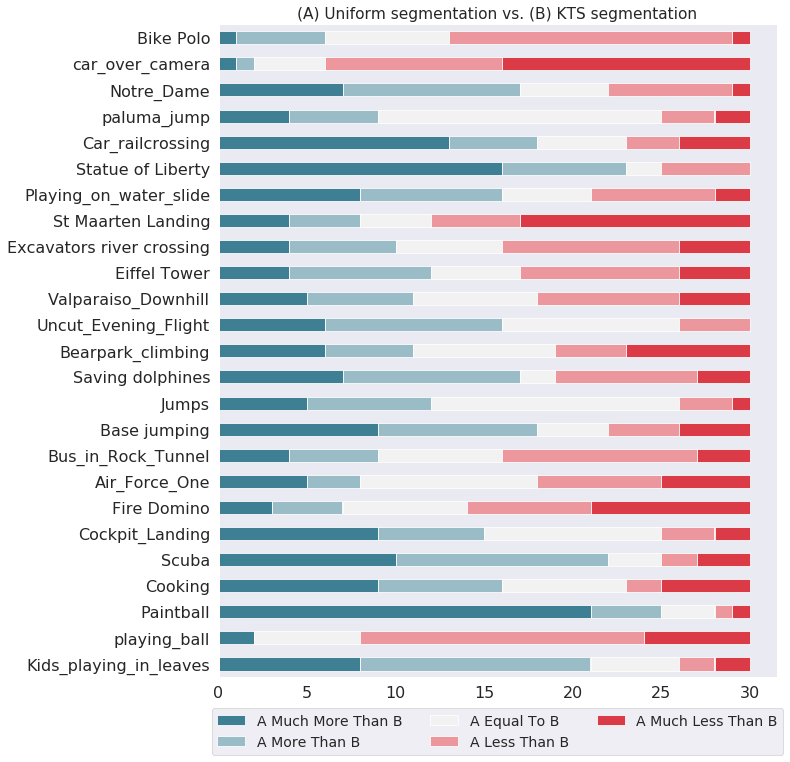

In [7]:
plot_score_barh('r_uni', 'r_kts', '(A) Uniform segmentation vs. (B) KTS segmentation')

## Comparison of summaries using different scoring method: Random scoring vs DR-DSN

method A: Video summaries generated using random scoring with KTS segmentation

method B: Video summaries generated using DR-DSN scoring with KTS segmentation

score:
- 2 method A better than method B
- 0: method A is eqally good (bad) to B
- -2: method A worse than method B

([<matplotlib.axis.XTick at 0x7f715eb909e8>,
 <a list of 5 Text xticklabel objects>)

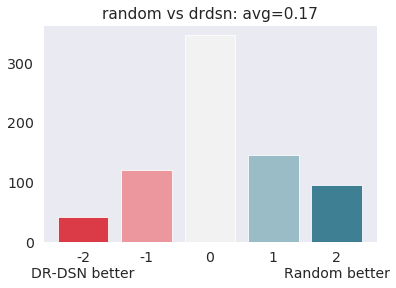

In [8]:
# summary
sub_df = df[(df.method_a == 'r_kts') & (df.method_b == 'drdsn')]
answer = sub_df.answer
answer_count = answer.value_counts()
plt.bar(index,
        answer_count[index],
        color=sns.diverging_palette(10, 220, n=5))
plt.title('random vs drdsn: avg=%.2f'%answer.mean())
plt.xticks(np.arange(-2, 3), ['-2\n{} better'.format('DR-DSN'),
                              '-1', '0', '1',
                              '2\n{} better'.format('Random')])

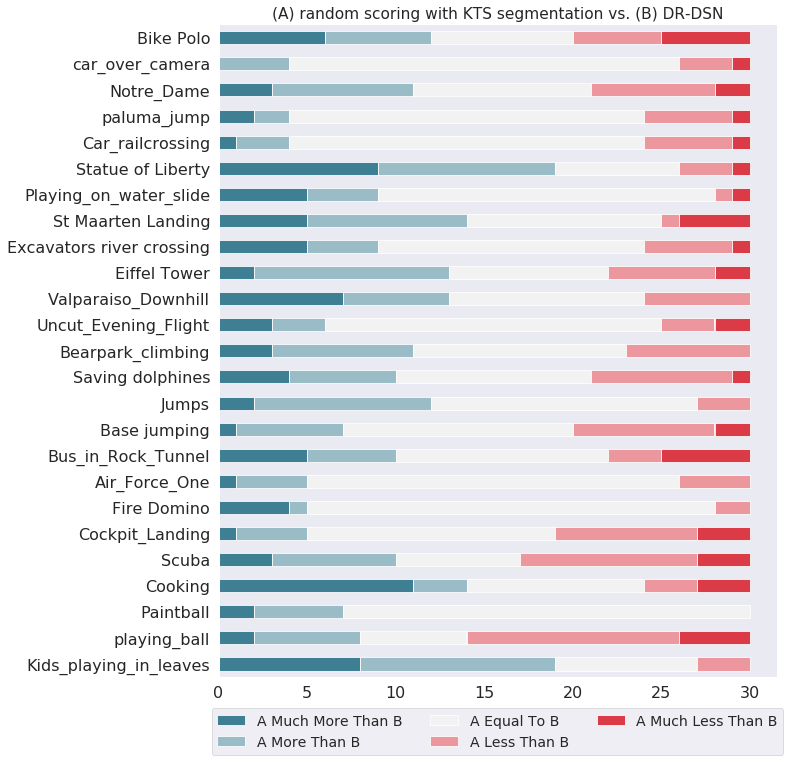

In [9]:
plot_score_barh('r_kts', 'drdsn', '(A) random scoring with KTS segmentation vs. (B) DR-DSN')

## Comparison between randomized summaries vs human 

method A: Video summaries generated using random scoring with KTS segmentation

method B: Manually created video summaries

score:
- 2 method A better than method B
- 0: method A is eqally good (bad) to B
- -2: method A worse than method B

([<matplotlib.axis.XTick at 0x7f715e9d5c88>,
 <a list of 5 Text xticklabel objects>)

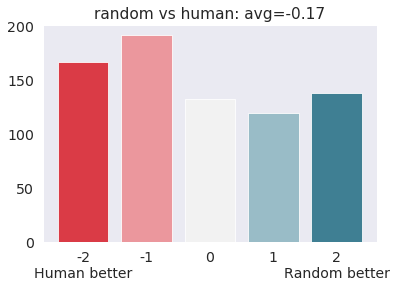

In [10]:
# summary
sub_df = df[(df.method_a == 'r_kts') & (df.method_b == 'h_avg')]
answer = sub_df.answer
answer_count = answer.value_counts()
plt.bar(index,
        answer_count[index],
        color=sns.diverging_palette(10, 220, n=5))
plt.title('random vs human: avg=%.2f'%answer.mean())
plt.xticks(np.arange(-2, 3), ['-2\n{} better'.format('Human'),
                              '-1', '0', '1',
                              '2\n{} better'.format('Random')])

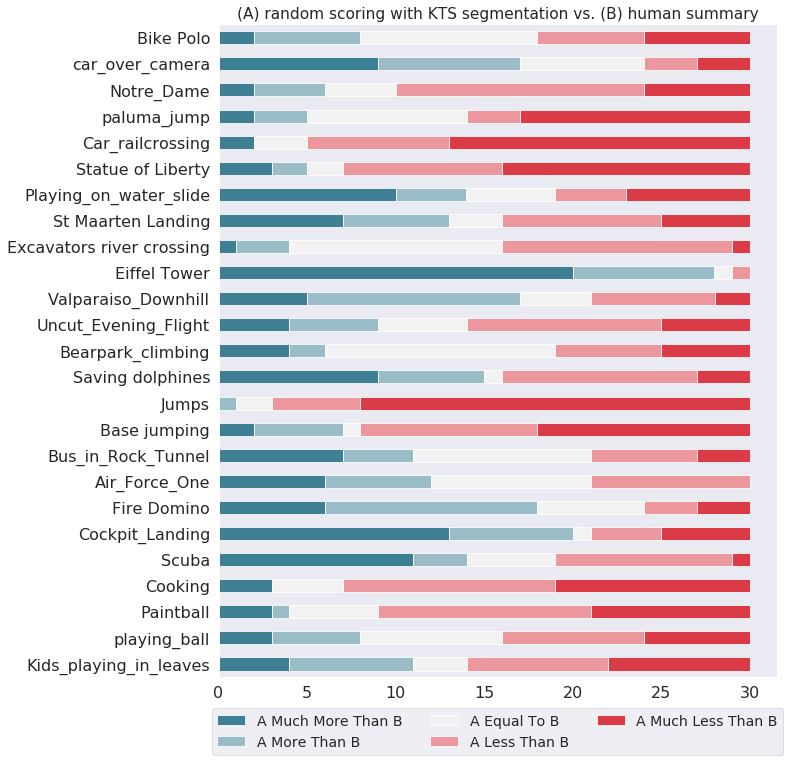

In [11]:
plot_score_barh('r_kts', 'h_avg', '(A) random scoring with KTS segmentation vs. (B) human summary')